# Иванова Елизавета Дмитриевна

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

$f(x,y) = x^2 - y^2$, $-1 \leq x \leq 1$, $-1 \leq y \leq 1$

# Точное решение

Text(0.5, 0.92, 'f точное')

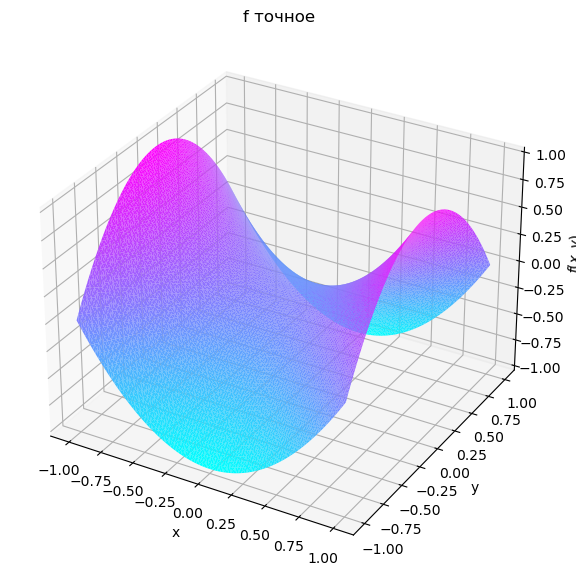

In [2]:
N = 100
h = 2/N
X = [-1 + i * h for i in range(N+1)]
Y = [-1 + k * h for k in range(N+1)]
f = np.zeros((N+1, N+1))

for i in range(N+1):
    for k in range(N+1):
        f[i, k] = X[i]**2 - Y[k]**2

xx, yy = [], []

for i in range(N+1):
    for k in range(N+1):
        xx.append(X[i])
        yy.append(Y[k])
        
ff = [f[i][k] for i in range(N+1) for k in range(N+1)]

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(xx, yy, ff, cmap='cool')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$f(x, y)$')
ax.set_title('f точное')        

# Метод Якоби для уравнения Лапласа

### Найдём численное решение с помощью итерационного метода Якоби. 

Будем использовать следующую формулу для вычисления приближений:

$f^{(n+1)}_{i,k} = \frac{1}{4}(f^{(n)}_{i+1,k} + f^{(n)}_{i-1,k} + f^{(n)}_{i,k+1} + f^{(n)}_{i,k-1})$

Также мы вычислим норму $||f||_C$ (максимальное отклонение между точным решением и текущим приближением в любой точке сетки) и норму $||f||_{L_2}$ (среднее отклонение между точным и приближенным решениями на всей сетке) для различных $N$.

In [3]:
# Массив Ns, который содержит значения размеров сетки от 10 до 160 с шагом 10
Ns = np.array([10, 20, 40, 80, 160])

# Пустые массивы norm_C и norm_L2, в которых будут хранениться значения нормы C и нормы L2 для разных размеров сетки
norm_C = np.array([])
norm_L2 = np.array([])

# Значение точности, которую мы хотим достичь
epsilon = 0.0001

# Пустой массив, в котором будет храниться количество итераций для каждого N для метода Якоби
Jacobi_iterations = np.array([])

for N in Ns:
    
    start_time = time.time()

    # Шаг сетки
    h = 2/N

    # Списки X и Y, которые содержат значения координат по осям X и Y для узлов сетки
    X = [-1 + i * h for i in range(N+1)]
    Y = [-1 + k * h for k in range(N+1)]
    
    xx, yy = [], []
    for i in range(N+1):
        for k in range(N+1):
            xx.append(X[i])
            yy.append(Y[k])

    # Точное решение
    f = np.zeros((N+1, N+1))
    for i in range(N+1):
        for k in range(N+1):
            f[i, k] = X[i]**2 - Y[k]**2

    # Первое приближение. Изначально матрица f0 копирует матрицу f, 
    # а затем обнуляются значения внутри сетки, оставляя значения на границе без изменений
    f0 = np.copy(f) 
    for i in range(1, N):
        for j in range(1, N):
            f0[i, j] = 0

    # Второе приближение. Она также инициализируется как копия f0, а затем вычисляются новые значения 
    # внутри сетки на основе предыдущего приближения с использованием метода Якоби
    f1 = np.copy(f0) 
    for i in range(1, N):
            for k in range(1, N):
                f1[i, k] = 1 / 4 * (f0[i + 1, k] + f0[i - 1, k] + f0[i, k + 1] + f0[i, k - 1])

    # Следующие приближения. Вычисления внутри сетки продолжаются, пока норма разницы между 
    # текущим приближением f1 и точным решением f больше заданной точности epsilon
    iteration = 1
    while (np.linalg.norm(f - f1) > epsilon):
        iteration += 1
        f0 = np.copy(f1)
        for i in range(1, N):
            for k in range(1, N):
                f1[i, k] = 1 / 4 * (f0[i + 1, k] + f0[i - 1, k] + f0[i, k + 1] + f0[i, k - 1])

    # Нормы C и L2
    norm_C = np.append(norm_C, np.linalg.norm(f - f1, np.inf) / np.linalg.norm(f, np.inf))
    norm_L2 = np.append(norm_L2, np.linalg.norm(f - f1) / np.linalg.norm(f))
    
    Jacobi_iterations = np.append(Jacobi_iterations, iteration)
    elapsed_time = time.time() - start_time
    elapsed_minutes = int(elapsed_time // 60)
    elapsed_seconds = int(elapsed_time % 60)
    elapsed_time_str = f'{elapsed_minutes:02d}:{elapsed_seconds:02d}'
    print(f'N = {N} \nКоличество итераций = {Jacobi_iterations[-1]} \nВремя работы программы при N = {N}: {elapsed_time_str}\n')

N = 10 
Количество итераций = 39.0 
Время работы программы при N = 10: 00:00

N = 20 
Количество итераций = 175.0 
Время работы программы при N = 20: 00:00

N = 40 
Количество итераций = 750.0 
Время работы программы при N = 40: 00:02

N = 80 
Количество итераций = 3188.0 
Время работы программы при N = 80: 01:06

N = 160 
Количество итераций = 13481.0 
Время работы программы при N = 160: 15:53



### Численное решение с помощью метода Якоби

Text(0.5, 0.92, 'f численное при $N$ = 160')

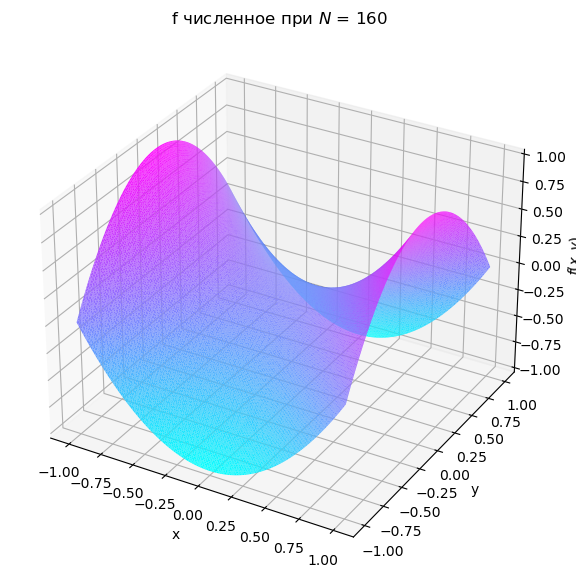

In [4]:
ff1 = [f1[i][k] for i in range(N+1) for k in range(N+1)]
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(xx, yy, ff1, cmap='cool')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$f(x, y)$')
ax.set_title(f'f численное при $N$ = {Ns[-1]}')

### График изменения $\varepsilon$ при увеличении $N$ в методе Якоби

Text(0, 0.5, '$\\epsilon$')

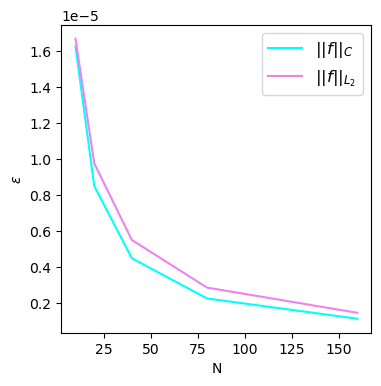

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(Ns, norm_C, color = 'aqua', label = '$||f||_C$')
ax.plot(Ns, norm_L2, color = 'violet', label = '$||f||_{L_2}$')
ax.legend(fontsize = 12)
ax.set_xlabel('N')
ax.set_ylabel('$\epsilon$')

In [6]:
norm_C

array([1.62684469e-05, 8.49544616e-06, 4.48656202e-06, 2.24965236e-06,
       1.12434345e-06])

In [7]:
norm_L2

array([1.66924118e-05, 9.75739587e-06, 5.50077634e-06, 2.85648286e-06,
       1.45373165e-06])

# Метод Зейделя

### Найдём численное решение с помощью итерационного метода Зейделя

Будем использовать следующую формулу для вычисления приближений:

$f^{(n+1)}_{i,k} = \frac{1}{4}(f^{(n)}_{i+1,k} + f^{(n+1)}_{i-1,k} + f^{(n)}_{i,k+1} + f^{(n+1)}_{i,k-1})$

Также мы вычислим норму $||f||_C$ (максимальное отклонение между точным решением и текущим приближением в любой точке сетки) и норму $||f||_{L_2}$ (среднее отклонение между точным и приближенным решениями на всей сетке) для различных $N$.

In [8]:
# Массив Ns, который содержит значения размеров сетки
Ns = np.array([10, 20, 40, 80, 160])

# Пустые массивы norm_C и norm_L2, в которых будут хранениться значения нормы C и нормы L2 для разных размеров сетки
normz_C = np.array([])
normz_L2 = np.array([])

# Значение точности, которую мы хотим достичь
epsilon = 0.0001

# Пустой массив, в котором будет храниться количество итераций для каждого N для метода Зейделя
Seidel_iterations = np.array([])

for N in Ns:

    start_time = time.time()
    
    # Шаг сетки
    h = 2/N

    # Списки X и Y, которые содержат значения координат по осям X и Y для узлов сетки
    X = [-1 + i * h for i in range(N+1)]
    Y = [-1 + k * h for k in range(N+1)]
    
    xx, yy = [], []
    for i in range(N+1):
        for k in range(N+1):
            xx.append(X[i])
            yy.append(Y[k])

    # Точное решение
    f = np.zeros((N+1, N+1))
    for i in range(N+1):
        for k in range(N+1):
            f[i, k] = X[i]**2 - Y[k]**2

    # Первое приближение. Изначально матрица f0 копирует матрицу f, 
    # а затем обнуляются значения внутри сетки, оставляя значения на границе без изменений
    f0 = np.copy(f) 
    for i in range(1, N):
        for j in range(1, N):
            f0[i, j] = 0

    # Второе приближение. Она также инициализируется как копия f0, а затем вычисляются новые значения 
    # внутри сетки на основе предыдущего приближения с использованием метода Зейделя
    f1 = np.copy(f0) 
    for i in range(1, N):
            for k in range(1, N):
                f1[i, k] = 1 / 4 * (f0[i + 1, k] + f1[i - 1, k] + f0[i, k + 1] + f1[i, k - 1])

    # Следующие приближения. Вычисления внутри сетки продолжаются, пока норма разницы между 
    # текущим приближением f1 и точным решением f больше заданной точности epsilon
    iteration = 1
    while (np.linalg.norm(f - f1) > epsilon):
        iteration += 1
        f0 = np.copy(f1)
        for i in range(1, N):
            for k in range(1, N):
                f1[i, k] = 1 / 4 * (f0[i + 1, k] + f1[i - 1, k] + f0[i, k + 1] + f1[i, k - 1])

    # Нормы C и L2
    normz_C = np.append(normz_C, np.linalg.norm(f - f1, np.inf) / np.linalg.norm(f, np.inf))
    normz_L2 = np.append(normz_L2, np.linalg.norm(f - f1) / np.linalg.norm(f))
    
    Seidel_iterations = np.append(Seidel_iterations, iteration)
    elapsed_time = time.time() - start_time
    elapsed_minutes = int(elapsed_time // 60)
    elapsed_seconds = int(elapsed_time % 60)
    elapsed_time_str = f'{elapsed_minutes:02d}:{elapsed_seconds:02d}'
    print(f'N = {N} \nКоличество итераций = {Seidel_iterations[-1]} \nВремя работы программы при N = {N}: {elapsed_time_str}\n')

N = 10 
Количество итераций = 38.0 
Время работы программы при N = 10: 00:00

N = 20 
Количество итераций = 157.0 
Время работы программы при N = 20: 00:00

N = 40 
Количество итераций = 633.0 
Время работы программы при N = 40: 00:02

N = 80 
Количество итераций = 2542.0 
Время работы программы при N = 80: 00:43

N = 160 
Количество итераций = 10185.0 
Время работы программы при N = 160: 09:43



### Численное решение с помощью метода Зейделя

Text(0.5, 0.92, 'f численное при $N$ = 160')

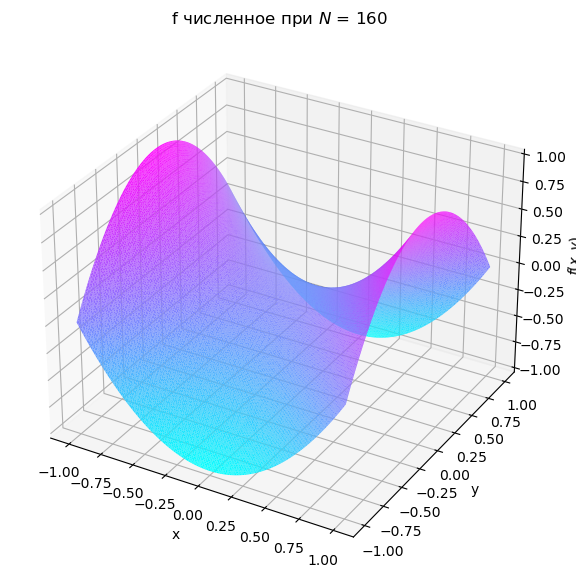

In [9]:
ff1 = [f1[i][k] for i in range(N+1) for k in range(N+1)]
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(xx, yy, ff1, cmap='cool')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$f(x, y)$')
ax.set_title(f'f численное при $N$ = {Ns[-1]}')

### График изменения $\varepsilon$ при увеличении $N$ в методе Зейделя

Text(0, 0.5, '$\\epsilon$')

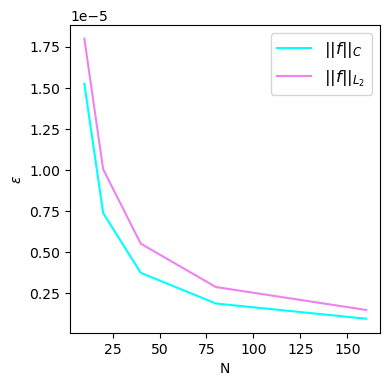

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(Ns, normz_C, color = 'aqua', label = '$||f||_C$')
ax.plot(Ns, normz_L2, color = 'violet', label = '$||f||_{L_2}$')
ax.legend(fontsize = 12)
ax.set_xlabel('N')
ax.set_ylabel('$\epsilon$')

In [11]:
normz_C

array([1.52243588e-05, 7.35960483e-06, 3.71841084e-06, 1.84906808e-06,
       9.21866161e-07])

In [12]:
normz_L2

array([1.79742430e-05, 1.00251766e-05, 5.49531009e-06, 2.85233019e-06,
       1.45442394e-06])

# SOR

### Найдём численное решение с помощью итерационного метода SOR (successive over-relaxation)

Будем использовать следующую формулу для вычисления приближений:

$f^{(n+1)}_{i,k} = (1 - \omega)f^{(n)}_{i,k} + \omega \frac{1}{4}(f^{(n)}_{i+1,k} + f^{(n+1)}_{i-1,k} + f^{(n)}_{i,k+1} + f^{(n+1)}_{i,k-1})$

Также мы вычислим норму $||f||_C$ (максимальное отклонение между точным решением и текущим приближением в любой точке сетки) и норму $||f||_{L_2}$ (среднее отклонение между точным и приближенным решениями на всей сетке) для различных $N$.

In [25]:
# Массив Ns, который содержит значения размеров сетки
Ns = np.array([10, 20, 40, 80, 160])
omegas = np.array([1.1, 1.3, 1.5, 1.7, 1.9])

# Пустые массивы norm_C и norm_L2, в которых будут хранениться значения нормы C и нормы L2 для разных размеров сетки
norms_C = np.array([])
norms_L2 = np.array([])

# Значение точности, которую мы хотим достичь
epsilon = 0.0001

# Пустой массив, в котором будет храниться количество итераций для каждого N для метода SOR
SOR_all_iterations = np.array([])

for N in Ns:
    print(f'N = {N}\n')
    SOR_iterations = np.array([])
    for omega in omegas:
        start_time = time.time()

        # Шаг сетки
        h = 2/N

        # Списки X и Y, которые содержат значения координат по осям X и Y для узлов сетки
        X = [-1 + i * h for i in range(N+1)]
        Y = [-1 + k * h for k in range(N+1)]

        xx, yy = [], []
        for i in range(N+1):
            for k in range(N+1):
                xx.append(X[i])
                yy.append(Y[k])

        # Точное решение
        f = np.zeros((N+1, N+1))
        for i in range(N+1):
            for k in range(N+1):
                f[i, k] = X[i]**2 - Y[k]**2

        # Первое приближение. Изначально матрица f0 копирует матрицу f, 
        # а затем обнуляются значения внутри сетки, оставляя значения на границе без изменений
        f0 = np.copy(f) 
        for i in range(1, N):
            for j in range(1, N):
                f0[i, j] = 0

        # Второе приближение. Она также инициализируется как копия f0, а затем вычисляются новые значения 
        # внутри сетки на основе предыдущего приближения с использованием метода Якоби
        f1 = np.copy(f0) 
        for i in range(1, N):
                for k in range(1, N):
                    f1[i, k] = (1 - omega) * f0[i, k] + 1 / 4 * omega * (f0[i + 1, k] + f1[i - 1, k] + f0[i, k + 1] + f1[i, k - 1])

        # Следующие приближения. Вычисления внутри сетки продолжаются, пока норма разницы между 
        # текущим приближением f1 и точным решением f больше заданной точности epsilon
        iteration = 1
        while (np.linalg.norm(f - f1) > epsilon):
            iteration += 1
            f0 = np.copy(f1)
            for i in range(1, N):
                for k in range(1, N):
                    f1[i, k] = (1 - omega) * f0[i, k] + 1 / 4 * omega * (f0[i + 1, k] + f1[i - 1, k] + f0[i, k + 1] + f1[i, k - 1])


        # Нормы C и L2
        if omega == 1.9:
            norms_C = np.append(norms_C, np.linalg.norm(f - f1, np.inf) / np.linalg.norm(f, np.inf))
            norms_L2 = np.append(norms_L2, np.linalg.norm(f - f1) / np.linalg.norm(f))

        SOR_iterations = np.append(SOR_iterations, iteration)
        
        elapsed_time = time.time() - start_time
        elapsed_minutes = int(elapsed_time // 60)
        elapsed_seconds = int(elapsed_time % 60)
        elapsed_time_str = f'{elapsed_minutes:02d}:{elapsed_seconds:02d}'
            
        print(f'Количество итераций при omega = {omega}: {SOR_iterations[-1]}')
        print(f'Время работы программы при N = {N} и omega = {omega}: {elapsed_time_str}\n')
    SOR_all_iterations = np.append(SOR_all_iterations, SOR_iterations)

N = 10

Количество итераций при omega = 1.1: 31.0
Время работы программы при N = 10 и omega = 1.1: 00:00

Количество итераций при omega = 1.3: 19.0
Время работы программы при N = 10 и omega = 1.3: 00:00

Количество итераций при omega = 1.5: 19.0
Время работы программы при N = 10 и omega = 1.5: 00:00

Количество итераций при omega = 1.7: 31.0
Время работы программы при N = 10 и omega = 1.7: 00:00

Количество итераций при omega = 1.9: 98.0
Время работы программы при N = 10 и omega = 1.9: 00:00

N = 20

Количество итераций при omega = 1.1: 131.0
Время работы программы при N = 20 и omega = 1.1: 00:00

Количество итераций при omega = 1.3: 88.0
Время работы программы при N = 20 и omega = 1.3: 00:00

Количество итераций при omega = 1.5: 53.0
Время работы программы при N = 20 и omega = 1.5: 00:00

Количество итераций при omega = 1.7: 40.0
Время работы программы при N = 20 и omega = 1.7: 00:00

Количество итераций при omega = 1.9: 105.0
Время работы программы при N = 20 и omega = 1.9: 00:00

N 

### Численное решение с помощью метода SOR

Text(0.5, 0.92, 'f численное при $N$ = 160')

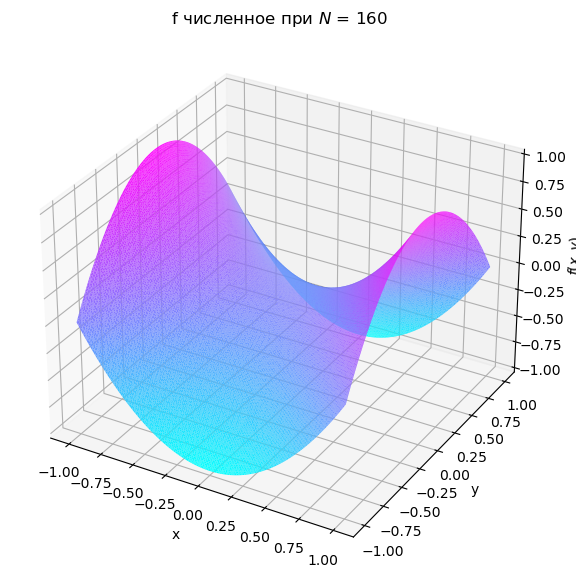

In [26]:
ff1 = [f1[i][k] for i in range(N+1) for k in range(N+1)]
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(xx, yy, ff1, cmap='cool')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$f(x, y)$')
ax.set_title(f'f численное при $N$ = {Ns[-1]}')

### График изменения $\varepsilon$ при увеличении $N$ в методе SOR ($\omega = 1.9$)

Text(0, 0.5, '$\\epsilon$')

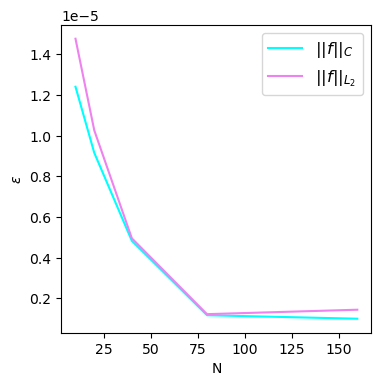

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(Ns, norms_C, color = 'aqua', label = '$||f||_C$')
ax.plot(Ns, norms_L2, color = 'violet', label = '$||f||_{L_2}$')
ax.legend(fontsize = 12)
ax.set_xlabel('N')
ax.set_ylabel('$\epsilon$')

In [28]:
norms_C

array([1.23989844e-05, 9.14985314e-06, 4.82394123e-06, 1.16905409e-06,
       9.96711316e-07])

In [29]:
norms_L2

array([1.47600340e-05, 1.02559577e-05, 4.94950963e-06, 1.22114166e-06,
       1.43924681e-06])

### График зависимости количества итераций от $\omega$

In [46]:
SOR_all_iterations = np.array_split(SOR_all_iterations, len(SOR_all_iterations)//5)
SOR_all_iterations

[array([[  31.,   19.,   19.,   31.,   98.],
        [ 131.,   88.,   53.,   40.,  105.],
        [ 528.,  361.,  230.,  120.,  123.],
        [2122., 1453.,  938.,  518.,  161.],
        [8503., 5828., 3771., 2105.,  651.]])]

Text(0.5, 1.0, '$N$ = 10')

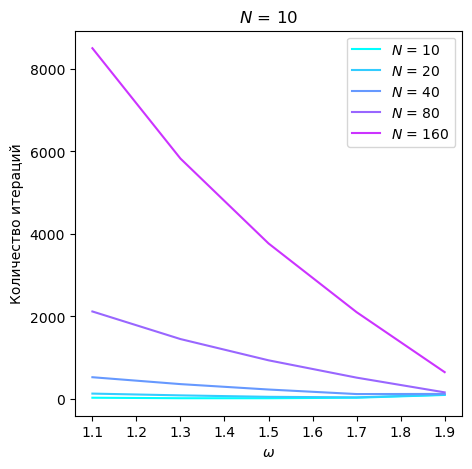

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
cmap = plt.get_cmap("cool")

for i in range(len(SOR_all_iterations[0])):
    ax.plot(omegas, SOR_all_iterations[0][i], label=f'$N$ = {Ns[i]}', color=cmap(i / len(SOR_all_iterations[0])))

ax.legend()
ax.set_xlabel('$\omega$')
ax.set_ylabel('Количество итераций')
ax.set_title(f'$N$ = {Ns[0]}')

## Сравнение норм в методах Якоби, Зейделя и SOR ($\omega = 1.9$)

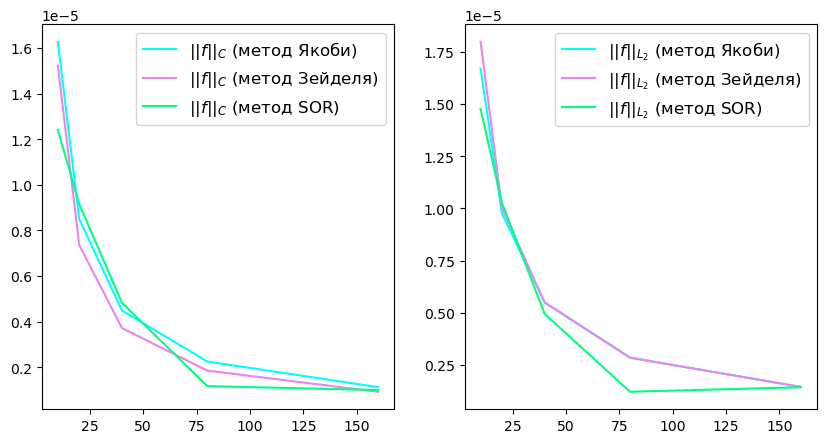

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(Ns, norm_C, color = 'aqua', label = '$||f||_C$ (метод Якоби)')
ax[0].plot(Ns, normz_C, color = 'violet', label = '$||f||_C$ (метод Зейделя)')
ax[0].plot(Ns, norms_C, color = 'SpringGreen', label = '$||f||_C$ (метод SOR)')
ax[0].legend(fontsize = 12)

ax[1].plot(Ns, norm_L2, color = 'aqua', label = '$||f||_{L_2}$ (метод Якоби)')
ax[1].plot(Ns, normz_L2, color = 'violet', label = '$||f||_{L_2}$ (метод Зейделя)')
ax[1].plot(Ns, norms_L2, color = 'SpringGreen', label = '$||f||_{L_2}$ (метод SOR)')
ax[1].legend(fontsize = 12)

Text(0, 0.5, '$\\epsilon$')

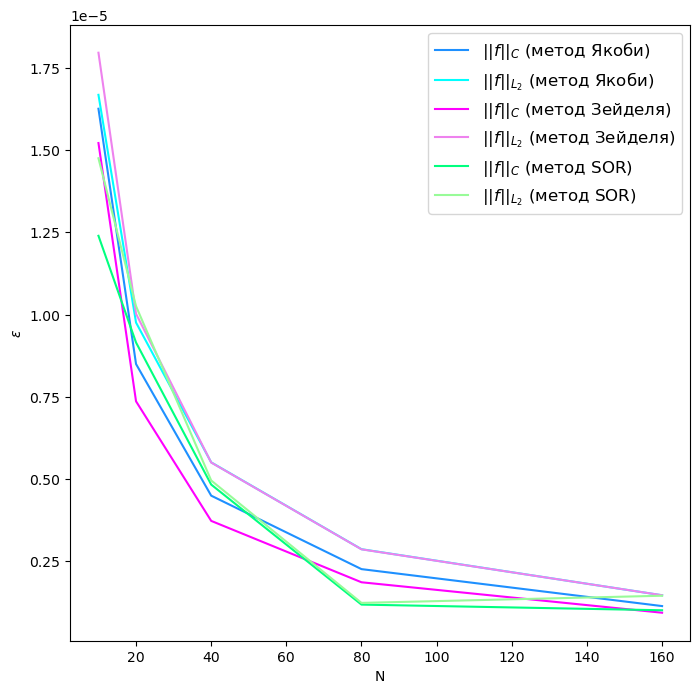

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(Ns, norm_C, color = 'DodgerBlue', label = '$||f||_C$ (метод Якоби)')
ax.plot(Ns, norm_L2, color = 'aqua', label = '$||f||_{L_2}$ (метод Якоби)')
ax.plot(Ns, normz_C, color = 'Fuchsia', label = '$||f||_C$ (метод Зейделя)')
ax.plot(Ns, normz_L2, color = 'violet', label = '$||f||_{L_2}$ (метод Зейделя)')
ax.plot(Ns, norms_C, color = 'SpringGreen', label = '$||f||_C$ (метод SOR)')
ax.plot(Ns, norms_L2, color = 'PaleGreen', label = '$||f||_{L_2}$ (метод SOR)')
ax.legend(fontsize = 12)
ax.set_xlabel('N')
ax.set_ylabel('$\epsilon$')

## Сравнение количества итераций в в методах Якоби, Зейделя и SOR ($\omega = 1.9$)

In [74]:
SOR_iter = np.array([])
for i in range(len(SOR_all_iterations[0])):
    SOR_iter = np.append(SOR_iter, SOR_all_iterations[0][i][-1])

Text(0, 0.5, 'Количество итераций')

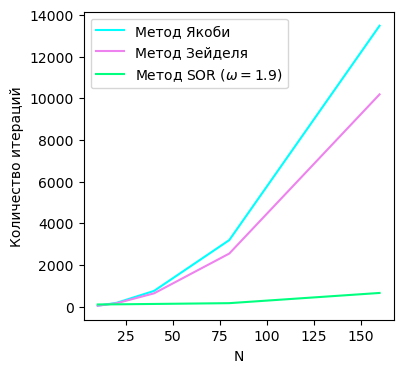

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(Ns, Jacobi_iterations, color = 'aqua', label = 'Метод Якоби')
ax.plot(Ns, Seidel_iterations, color = 'violet', label = 'Метод Зейделя')
ax.plot(Ns, SOR_iter, color = 'SpringGreen', label = 'Метод SOR ($\omega = 1.9$)')
ax.legend()
ax.set_xlabel('N')
ax.set_ylabel('Количество итераций')

In [78]:
Jacobi_iterations

array([   39.,   175.,   750.,  3188., 13481.])

In [79]:
Seidel_iterations

array([   38.,   157.,   633.,  2542., 10185.])

In [80]:
SOR_iter

array([ 98., 105., 123., 161., 651.])